## Simple Pandas example: F-1 results
How to read, join and aggregate data in CSV files using Pandas.  
- Kaggle datase "[Formula 1 Race Data](https://www.kaggle.com/cjgdev/formula-1-race-data-19502017)" is used 
  - download extract the zip file
  - place file to a location visible from the container and set relative file locations of `read_csv()`
- We would like to know which drivers spent the most time racing, and check distribution of the aggregated race times of the drivers. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Read relevant CSV files

In [2]:
drivers_df = pd.read_csv("../../formula-1-race-data/drivers.csv", encoding="latin1")
drivers_df.head(10)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
5,6,nakajima,NaN,NAK,Kazuki,Nakajima,11/01/1985,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
6,7,bourdais,NaN,BOU,SÌ©bastien,Bourdais,28/02/1979,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...
7,8,raikkonen,7.0,RAI,Kimi,RÌ_ikkÌ¦nen,17/10/1979,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
8,9,kubica,NaN,KUB,Robert,Kubica,07/12/1984,Polish,http://en.wikipedia.org/wiki/Robert_Kubica
9,10,glock,NaN,GLO,Timo,Glock,18/03/1982,German,http://en.wikipedia.org/wiki/Timo_Glock


In [3]:
lap_times_df = pd.read_csv("../../formula-1-race-data/lapTimes.csv")
lap_times_df.head(10)

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
5,841,20,6,1,1:32.605,92605
6,841,20,7,1,1:32.502,92502
7,841,20,8,1,1:32.537,92537
8,841,20,9,1,1:33.240,93240
9,841,20,10,1,1:32.572,92572


### Sum up lap times of drivers
- project on relevant columns, group by driverId, sum times in milliseconds
- draw histogram of times
- filter drivers over 100 hours
- add time values in hours

In [4]:
times_sum_df = lap_times_df[['driverId', 'milliseconds']].groupby(['driverId'], as_index=False).sum() \
    .sort_values(by=['milliseconds'], ascending=False)

times_sum_df['hours'] = times_sum_df['milliseconds'] / (1000*60*60)
times_sum_df.head(10)

,driverId,milliseconds,hours
17,18,1556614792,432.392998
3,4,1513292145,420.358929
12,13,1429686930,397.135258
21,22,1341706810,372.696336
7,8,1328518217,369.032838
29,30,1211760455,336.600126
14,15,1161028278,322.507855
0,1,1142081867,317.244963
2,3,1099210312,305.336198
19,20,1063949865,295.541629


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5833bf90f0>]],
      dtype=object)

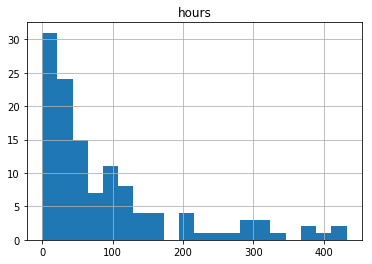

In [5]:
times_sum_df.hist(column='hours', bins=20)

In [6]:
top_times_sum_df = times_sum_df[times_sum_df['hours']>=100]

### Join driver data
and display toplist as a barchart 

In [7]:
top_times_sum_df = pd.merge(top_times_sum_df, drivers_df, on='driverId')

In [8]:
top_times_sum_df.head(10)

,driverId,milliseconds,hours,driverRef,number,code,forename,surname,dob,nationality,url
0,18,1556614792,432.392998,button,22.0,BUT,Jenson,Button,19/01/1980,British,http://en.wikipedia.org/wiki/Jenson_Button
1,4,1513292145,420.358929,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
2,13,1429686930,397.135258,massa,19.0,MAS,Felipe,Massa,25/04/1981,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa
3,22,1341706810,372.696336,barrichello,NaN,BAR,Rubens,Barrichello,23/05/1972,Brazilian,http://en.wikipedia.org/wiki/Rubens_Barrichello
4,8,1328518217,369.032838,raikkonen,7.0,RAI,Kimi,RÌ_ikkÌ¦nen,17/10/1979,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
5,30,1211760455,336.600126,michael_schumacher,NaN,MSC,Michael,Schumacher,03/01/1969,German,http://en.wikipedia.org/wiki/Michael_Schumacher
6,15,1161028278,322.507855,trulli,NaN,TRU,Jarno,Trulli,13/07/1974,Italian,http://en.wikipedia.org/wiki/Jarno_Trulli
7,1,1142081867,317.244963,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
8,3,1099210312,305.336198,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
9,20,1063949865,295.541629,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel


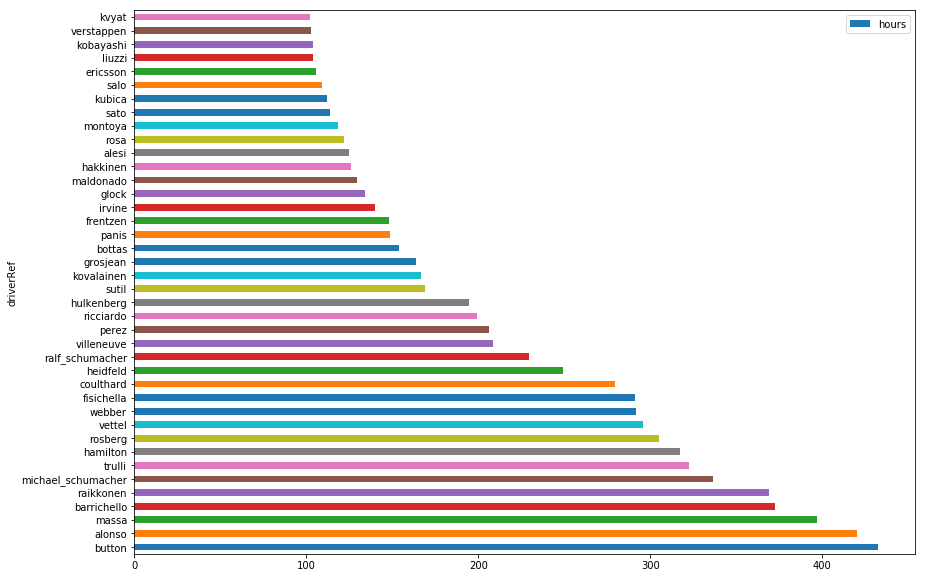

In [9]:
top_times_sum_df.plot.barh(y='hours', x='driverRef', figsize=(14,10))